In [1]:
#!pip install torch
#!pip install timesfm[torch]
#!pip install jax
# !pip install yfinance
# !pip install matplotlib
# !pip install timesfm[torch]

In [ ]:
import timesfm
import os
from huggingface_hub import login

from dotenv import load_dotenv


load_dotenv()
hf_token = os.getenv("HUGGINGFACE_API_KEY")

# Log in with the token
login(token=hf_token)


tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="gpu",
          per_core_batch_size=32,
          horizon_len=18,
          num_layers=50,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          version='torch',
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

Fetching 5 files: 100%|██████████| 5/5 [00:00<?, ?it/s]


### Uso de modelo fundacional con datos sintetica 

In [27]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [28]:
fecha_inicio = datetime.now()
num_dias = 365
dates = [fecha_inicio - timedelta(days=x) for x in range(num_dias)]
ventas = [100 + i * 10 + np.random.normal(0, 10) for i in range(num_dias)]

data = pd.DataFrame({'ds': dates, 'sales': ventas , 'unique_id':"sales"})

In [29]:
forecast_df = tfm.forecast_on_df(inputs=data,freq='D',value_name='sales',num_jobs=-1)

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


In [30]:
forecast_df

,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,sales,2025-03-29 10:34:28.355847,-94.437500,-127.536865,-116.194580,-107.704834,-99.908936,-94.437500,-87.841064,-82.873779,-76.352295,-67.819580
1,sales,2025-03-30 10:34:28.355847,-106.149658,-139.851562,-127.581299,-121.568848,-113.035889,-106.149658,-102.976562,-93.940186,-90.546875,-76.253174
2,sales,2025-03-31 10:34:28.355847,-118.754639,-152.458740,-139.963379,-131.655029,-124.568604,-118.754639,-112.289795,-107.823486,-101.684570,-89.447754
3,sales,2025-04-01 10:34:28.355847,-130.701904,-166.425049,-151.798828,-143.766357,-137.261475,-130.701904,-125.937012,-119.453369,-114.392822,-103.769043
4,sales,2025-04-02 10:34:28.355847,-142.387451,-173.768311,-163.062012,-154.147217,-150.864258,-142.387451,-137.916992,-132.141846,-125.460449,-116.538574
5,sales,2025-04-03 10:34:28.355847,-151.781494,-181.105957,-170.530273,-164.460449,-157.367188,-151.781494,-148.193359,-142.504150,-135.316895,-126.032471
6,sales,2025-04-04 10:34:28.355847,-156.835693,-185.562500,-176.776855,-167.971436,-162.900879,-156.835693,-151.902832,-147.038574,-142.184570,-131.296143
7,sales,2025-04-05 10:34:28.355847,-164.365967,-195.378662,-185.063965,-175.509521,-169.822754,-164.365967,-160.455322,-154.551758,-147.087158,-137.560059
8,sales,2025-04-06 10:34:28.355847,-173.126709,-205.728271,-192.085205,-184.409180,-177.892578,-173.126709,-165.679443,-159.436768,-153.939697,-145.213867
9,sales,2025-04-07 10:34:28.355847,-187.890625,-221.081543,-208.622070,-200.872559,-193.809814,-187.890625,-182.996582,-178.078369,-169.307129,-158.576172


### Usando datos de covid

In [5]:
import pandas as pd
datos_covid = pd.read_csv('C:/Users/criju/Documents/Codigos Tesis/data/covidsantander.csv')

C:\Users\criju\AppData\Local\Temp\ipykernel_18372\1522986600.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_covid = pd.read_csv('C:/Users/criju/Documents/Codigos Tesis/data/covidsantander.csv')


In [6]:
datos_covid.head(5)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-11-08 00:00:00,1137430,2020-10-31 00:00:00,68,SANTANDER,68001,BUCARAMANGA,77,1,M,...,NaN,NaN,Recuperado,2020-10-31 00:00:00,NaN,2020-11-06 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,NaN
1,2021-01-13 00:00:00,1830865,2020-12-30 00:00:00,68,SANTANDER,68001,BUCARAMANGA,37,1,M,...,NaN,NaN,Recuperado,2020-12-25 00:00:00,NaN,2021-01-10 00:00:00,2021-01-14 00:00:00,Tiempo,6.0,NaN
2,2021-01-13 00:00:00,1830866,2020-12-29 00:00:00,68,SANTANDER,68001,BUCARAMANGA,37,1,M,...,NaN,NaN,Recuperado,2020-12-24 00:00:00,NaN,2021-01-09 00:00:00,2021-01-14 00:00:00,PCR,6.0,NaN
3,2021-01-13 00:00:00,1830867,2020-12-29 00:00:00,68,SANTANDER,68001,BUCARAMANGA,37,1,M,...,NaN,NaN,Recuperado,2020-12-24 00:00:00,NaN,2021-01-09 00:00:00,2021-01-14 00:00:00,Tiempo,6.0,NaN
4,2021-01-13 00:00:00,1830851,2020-12-28 00:00:00,68,SANTANDER,68001,BUCARAMANGA,57,1,M,...,NaN,NaN,Recuperado,2020-12-23 00:00:00,NaN,2021-01-08 00:00:00,2021-01-14 00:00:00,Tiempo,6.0,NaN


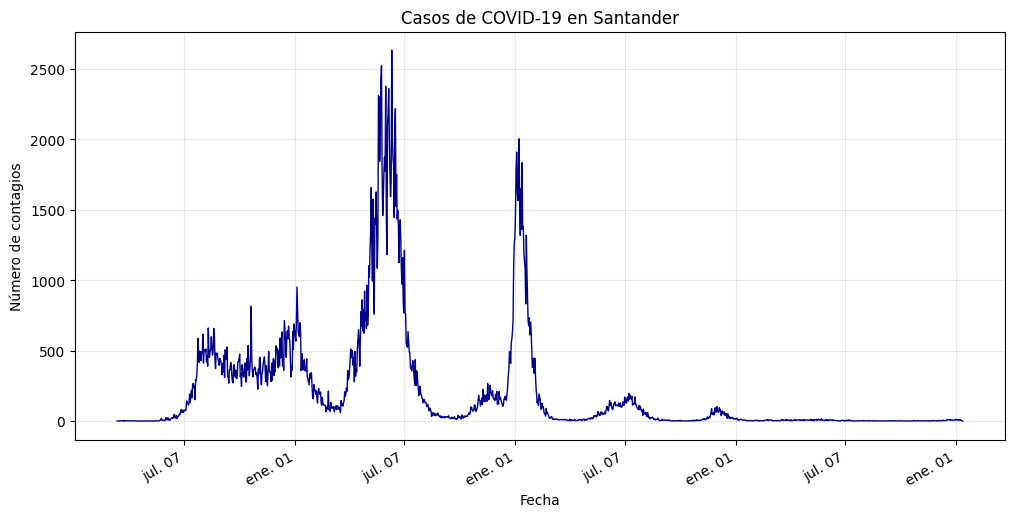

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# 2. Procesar fechas y contar casos
# Convertir a datetime y eliminar filas con fechas inválidas
datos_covid['Fecha_de_inicio'] = pd.to_datetime(
    datos_covid['Fecha de inicio de síntomas'], 
    errors='coerce'
)
datos_covid = datos_covid.dropna(subset=['Fecha_de_inicio'])

# Contar casos por fecha
casos_inicio = datos_covid['Fecha_de_inicio'].value_counts().reset_index()
casos_inicio.columns = ['Fecha', 'Frecuencia']
casos_inicio = casos_inicio.sort_values('Fecha')  # Ordenar cronológicamente

# 3. Crear secuencia completa de fechas
fechas_completas = pd.date_range(
    start='2020-03-12', 
    end='2023-04-14', 
    freq='D'
)

# 4. Combinar con frecuencias (equivalente a matriz_inicial)
serie_completa = pd.DataFrame({'Fecha': fechas_completas})
serie_completa = serie_completa.merge(
    casos_inicio, 
    on='Fecha', 
    how='left'
)

# 5. Visualización (similar al plot de R)
plt.figure(figsize=(12, 6))
plt.plot(
    casos_inicio['Fecha'], 
    casos_inicio['Frecuencia'], 
    color='darkblue', 
    lw=1
)

# Formatear eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %m'))
plt.gcf().autofmt_xdate()  # Rotar etiquetas
plt.title('Casos de COVID-19 en Santander')
plt.xlabel('Fecha')
plt.ylabel('Número de contagios')
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
casos_inicio

,Fecha,Frecuencia
1233,2020-03-12,2
1315,2020-03-13,1
1240,2020-03-14,1
1313,2020-03-15,1
1152,2020-03-17,3
...,...,...
857,2024-01-08,11
1013,2024-01-09,5
1099,2024-01-10,4
1163,2024-01-11,2


### División de la serie  

### Leer serie

In [ ]:
import pandas as pd
import timesfm
import os
from huggingface_hub import login

from dotenv import load_dotenv


load_dotenv()
hf_token = os.getenv("HUGGINGFACE_API_KEY")
# Log in with the token
login(token=hf_token)


df = pd.read_csv('C:/Users/criju/Documents/Codigos Tesis/data/serie.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.head(5)

,Fecha,Frecuencia
0,2020-03-12,2.0
1,2020-03-13,1.0
2,2020-03-14,1.0
3,2020-03-15,1.0
4,2020-03-16,0.0


Vamos a usar los primeros 2 intervalos para predicir para el 3 intervalo

In [11]:
# Ordenar los intervalos excluyendo valores NaN
# Crear 9 límites para obtener 8 intervalos regulares
# Determinar el rango de fechas
fecha_min = df['Fecha'].min()
fecha_max = df['Fecha'].max()

bins = pd.date_range(start=fecha_min, end=fecha_max, periods=9)

# Asignar cada fecha a un intervalo
df['Intervalo'] = pd.cut(df['Fecha'], bins=bins, include_lowest=True, right=False)

intervalos_ordenados = sorted(df['Intervalo'].dropna().unique(), key=lambda x: x.left)

# Tomar los primeros 2 intervalos
primeros_dos_intervalos = intervalos_ordenados[:3]

# Filtrar el DataFrame para quedarse solo con filas en los dos primeros intervalos
df_primeros_dos = df[df['Intervalo'].isin(primeros_dos_intervalos)]

# Mostrar el DataFrame resultante
df_primeros_dos.head(5)


,Fecha,Frecuencia,Intervalo
0,2020-03-12,2.0,"[2020-03-12 00:00:00, 2020-07-31 00:00:00)"
1,2020-03-13,1.0,"[2020-03-12 00:00:00, 2020-07-31 00:00:00)"
2,2020-03-14,1.0,"[2020-03-12 00:00:00, 2020-07-31 00:00:00)"
3,2020-03-15,1.0,"[2020-03-12 00:00:00, 2020-07-31 00:00:00)"
4,2020-03-16,0.0,"[2020-03-12 00:00:00, 2020-07-31 00:00:00)"


In [23]:
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="gpu",
          per_core_batch_size=32,
          horizon_len=15,
          num_layers=50
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          version='torch',
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

data = df_primeros_dos[['Fecha', 'Frecuencia']].rename(columns={'Fecha': 'ds', 'Frecuencia': 'sales'})
data["unique_id"] = "sales"

Fetching 5 files: 100%|██████████| 5/5 [00:00<?, ?it/s]


In [24]:
data

,ds,sales,unique_id
0,2020-03-12,2.0,sales
1,2020-03-13,1.0,sales
2,2020-03-14,1.0,sales
3,2020-03-15,1.0,sales
4,2020-03-16,0.0,sales
...,...,...,...
418,2021-05-04,1020.0,sales
419,2021-05-05,1207.0,sales
420,2021-05-06,1335.0,sales
421,2021-05-07,1657.0,sales


In [25]:
forecast_df = tfm.forecast_on_df(inputs=data,freq='D',value_name='sales',num_jobs=-1,forecast_context_len=15)

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


In [26]:
forecast_df

,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,sales,2021-05-09,1019.196228,888.022339,941.108032,970.742188,997.167053,1019.196228,1042.221436,1060.476196,1078.240845,1113.305176
1,sales,2021-05-10,826.903625,675.478638,734.485596,774.283264,803.400269,826.903625,850.820923,873.700500,900.875244,944.458557
2,sales,2021-05-11,761.517517,590.811829,654.892029,697.052856,730.420044,761.517517,788.394775,816.956604,845.200012,895.649414
3,sales,2021-05-12,483.792938,299.024658,369.486267,412.063599,450.324951,483.792938,512.874390,542.308105,579.120850,640.485107
4,sales,2021-05-13,709.140991,507.747650,582.229065,630.979126,670.915955,709.140991,742.066040,778.236816,821.595703,886.864746
5,sales,2021-05-14,357.602478,195.031006,255.046265,297.692139,328.011108,357.602478,386.214050,417.525330,456.115234,519.258789
6,sales,2021-05-15,611.652954,450.823669,511.394348,547.633850,580.979675,611.652954,642.689941,673.294312,713.988892,783.310547
7,sales,2021-05-16,712.283264,545.650330,603.525391,644.203247,679.717529,712.283264,744.219849,774.758240,818.779297,883.062927
8,sales,2021-05-17,802.267090,638.291504,700.394287,736.723877,770.181763,802.267090,833.326111,869.357971,912.602417,976.990234
9,sales,2021-05-18,900.869751,729.534485,796.439941,839.293640,872.739502,900.869751,934.567871,968.228821,1016.042175,1089.568848


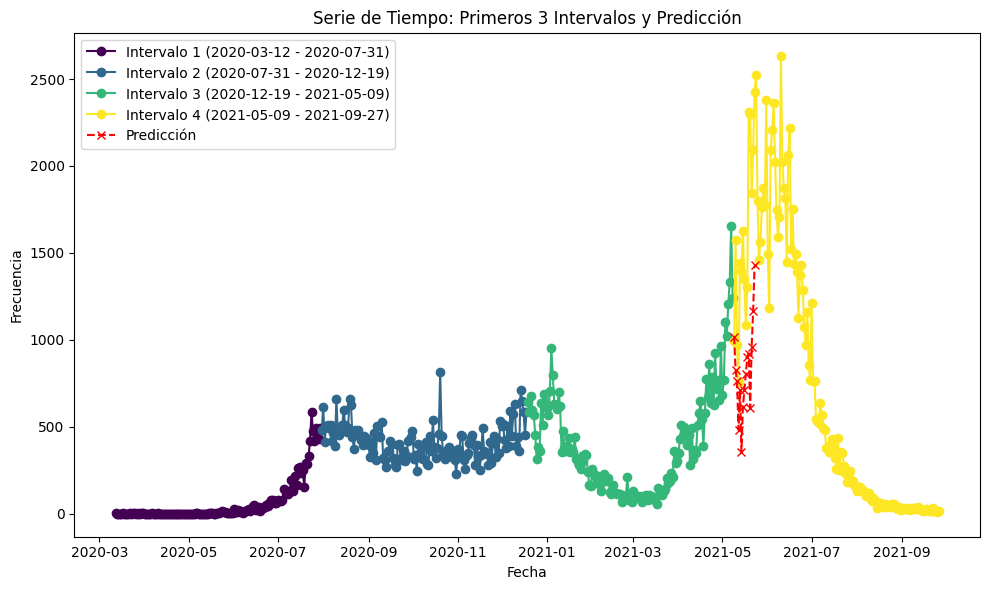

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Ordenar los intervalos (se ignoran los posibles NaN) y seleccionar los 3 primeros
intervalos_ordenados = sorted(df['Intervalo'].dropna().unique(), key=lambda x: x.left)
primeros_tres = intervalos_ordenados[:4]

# Filtrar el DataFrame para quedarnos solo con los datos de los 3 primeros intervalos
df_tres = df[df['Intervalo'].isin(primeros_tres)]

# Asegurarse de que forecast_df tenga la columna 'ds' en formato datetime
forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])

# (Opcional) Filtrar forecast_df para que solo incluya predicciones en el rango de los 3 intervalos:
limite_inferior = primeros_tres[0].left
limite_superior = primeros_tres[-1].right
forecast_df_filtrado = forecast_df[(forecast_df['ds'] >= limite_inferior) & (forecast_df['ds'] < limite_superior)]

# Preparar la figura para graficar
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener 3 colores de un colormap, por ejemplo 'viridis'
colores = plt.cm.viridis(np.linspace(0, 1, 4))

# Graficar los datos originales para cada uno de los 3 intervalos
for i, intervalo in enumerate(primeros_tres):
    datos_intervalo = df_tres[df_tres['Intervalo'] == intervalo]
    ax.plot(datos_intervalo['Fecha'], datos_intervalo['Frecuencia'],
            label=f'Intervalo {i+1} ({intervalo.left.date()} - {intervalo.right.date()})',
            color=colores[i], marker='o')

# Graficar las predicciones del modelo (forecast_df)
ax.plot(forecast_df_filtrado['ds'], forecast_df_filtrado['timesfm'], 
        label='Predicción', color='red', linestyle='--', marker='x')

# Configuración de la gráfica
ax.set_xlabel('Fecha')
ax.set_ylabel('Frecuencia')
ax.set_title('Serie de Tiempo: Primeros 3 Intervalos y Predicción')
ax.legend()
plt.tight_layout()
plt.show()


### Inferencia con el modelo fundacional

Revisando la documentación de Timestf, el modelo esta pensando para hacer la inferencia de datos consecutivos

Fetching 5 files: 100%|██████████| 5/5 [00:00<?, ?it/s]



=== EVALUANDO HORIZONTE 15 DÍAS ===
Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


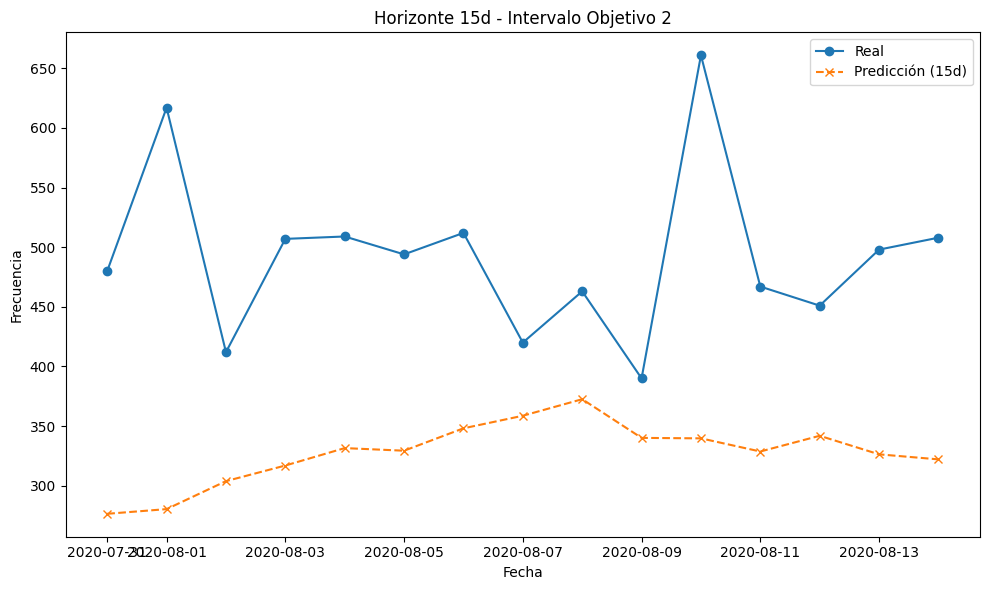

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


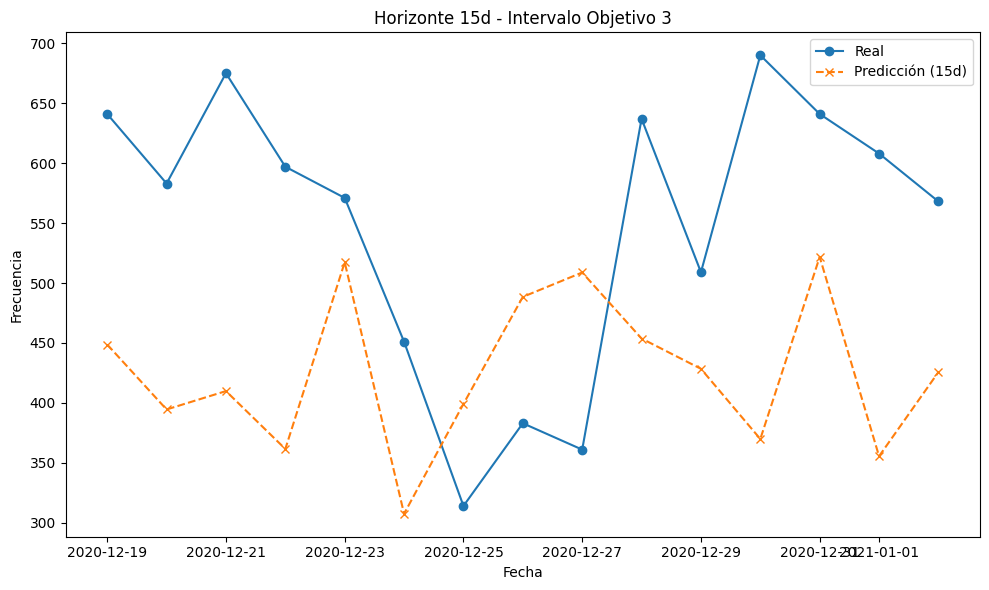

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


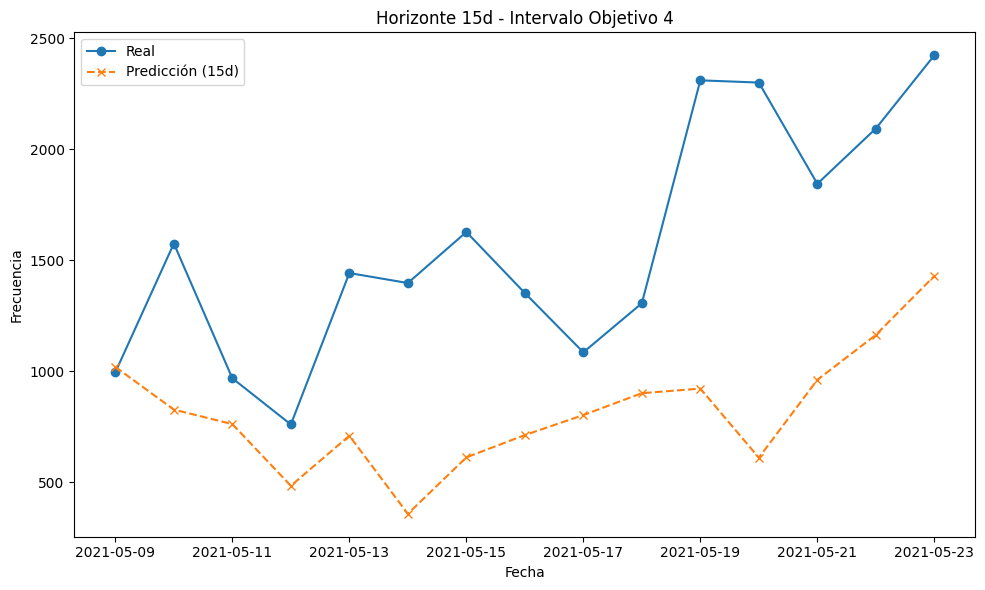

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


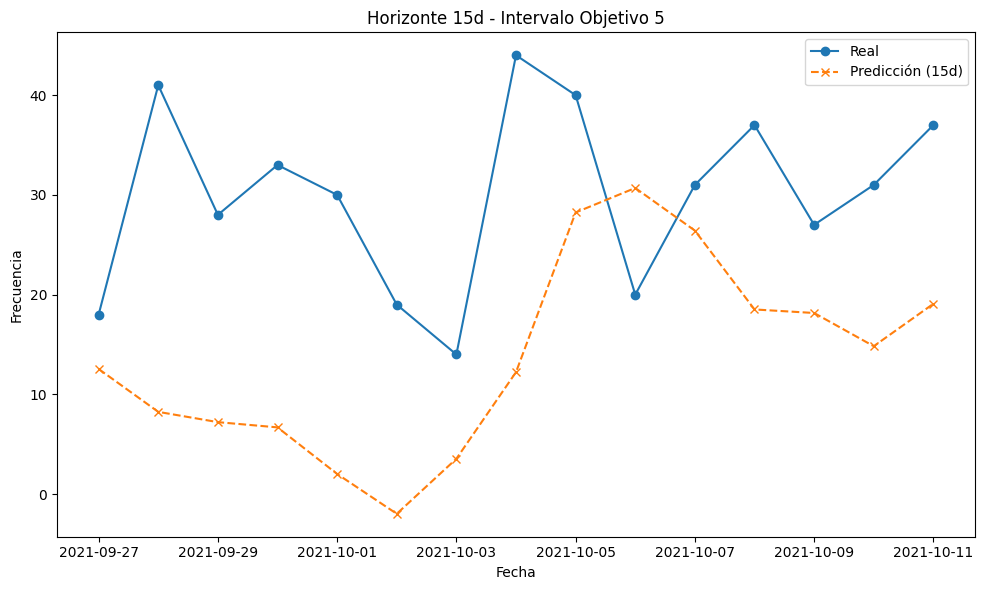

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


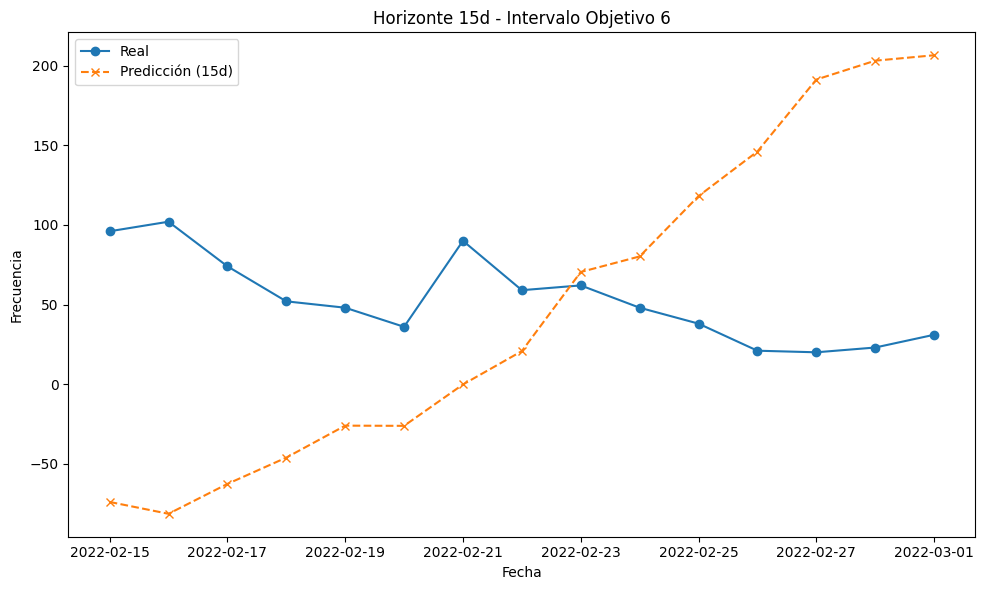

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


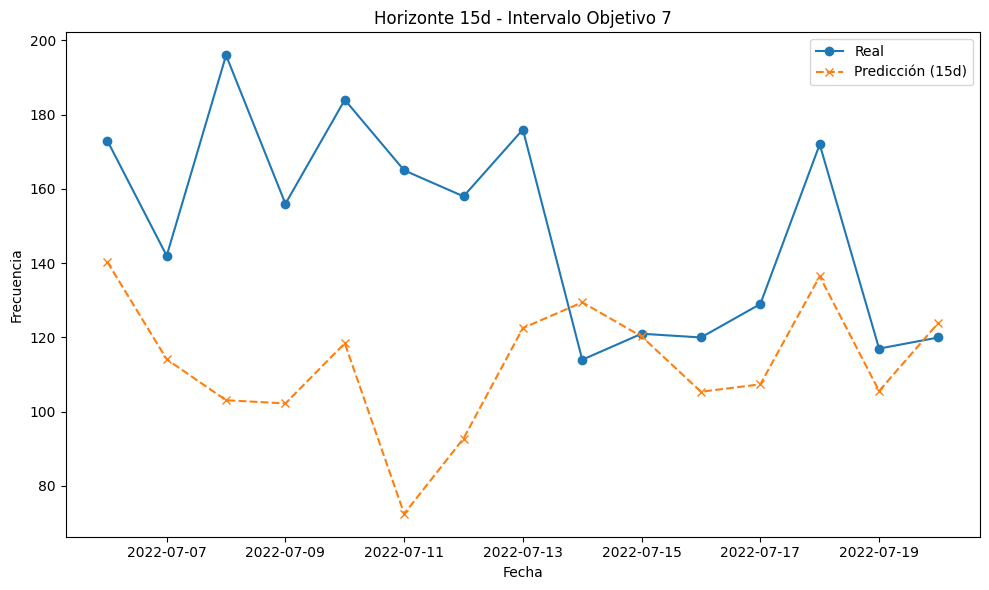

Fetching 5 files: 100%|██████████| 5/5 [00:00<?, ?it/s]



=== EVALUANDO HORIZONTE 30 DÍAS ===
Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


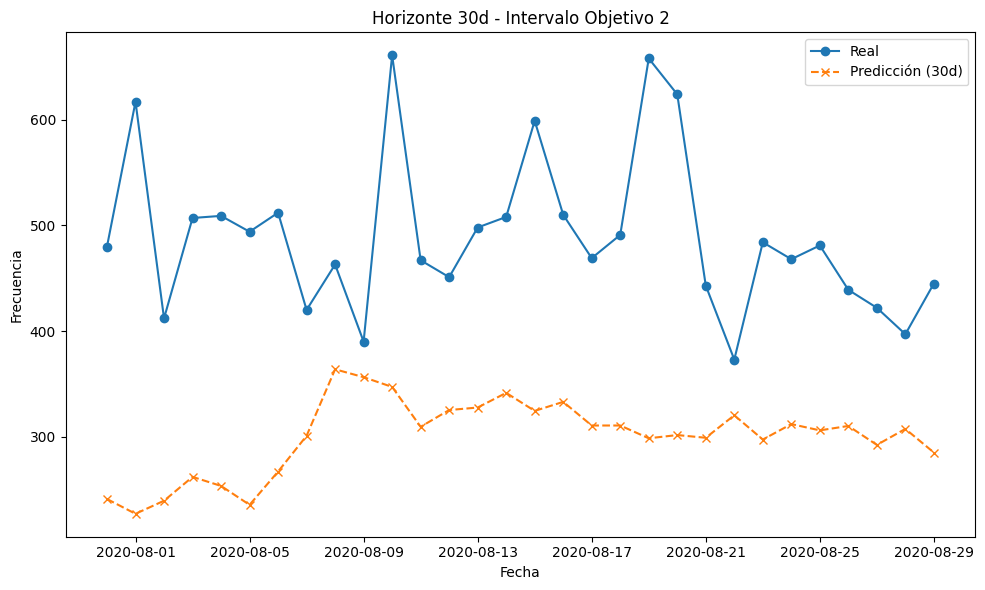

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


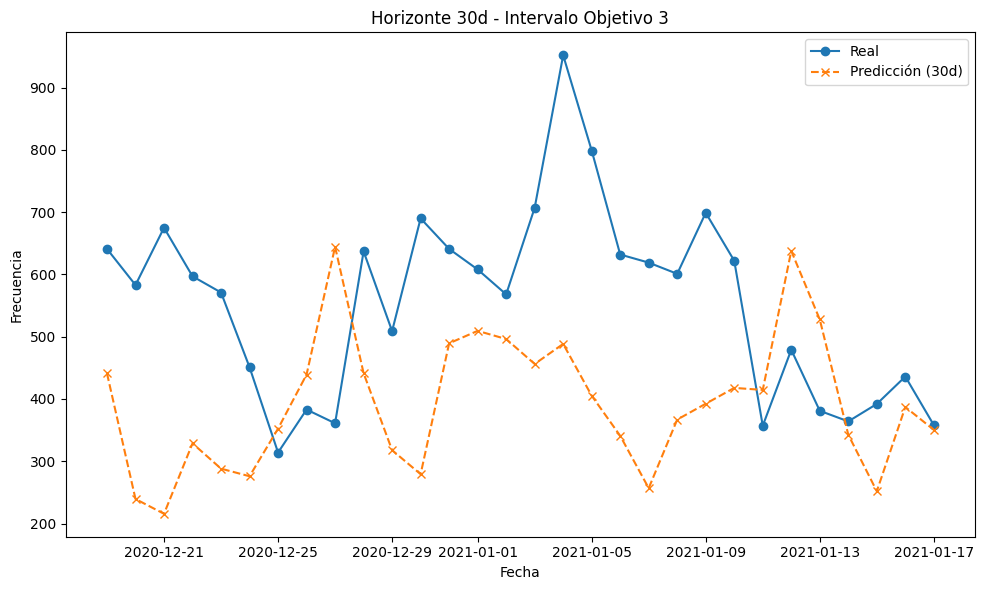

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


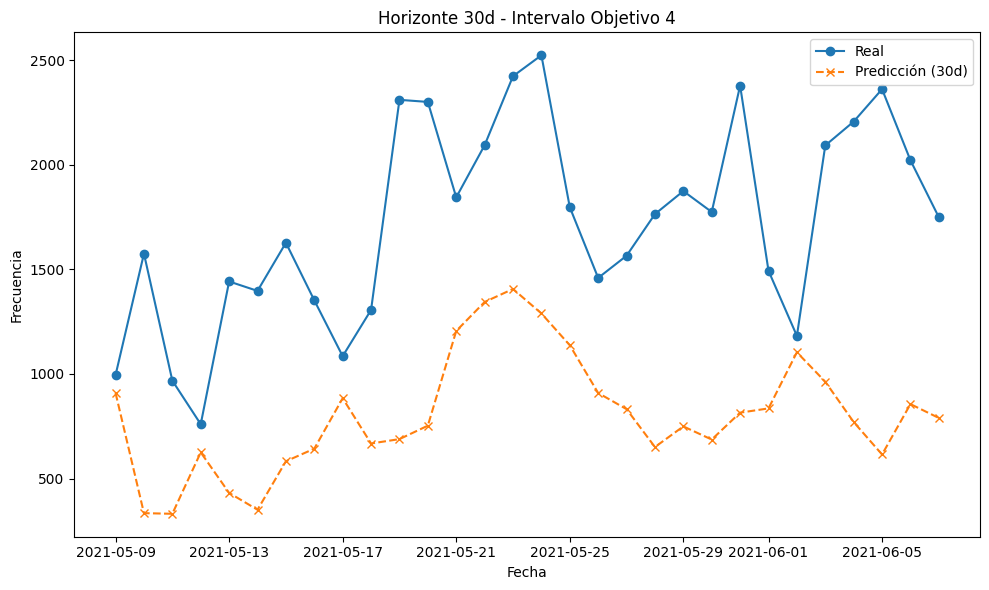

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


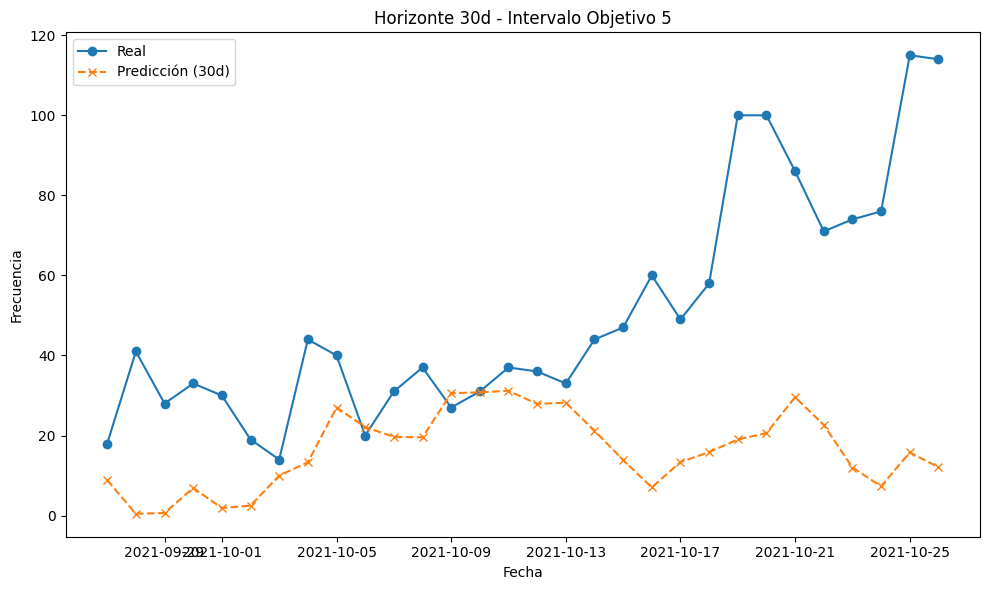

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


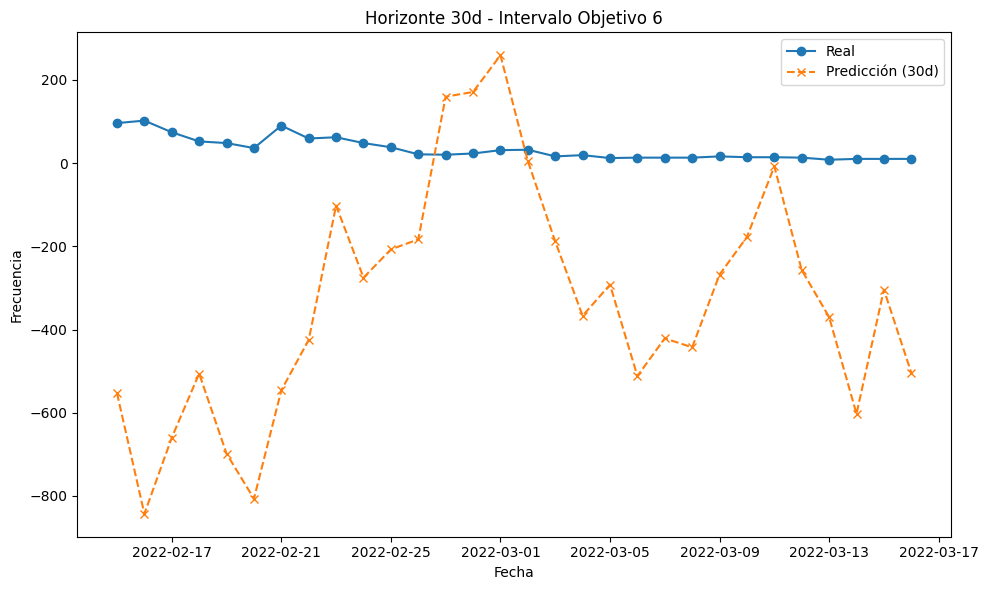

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


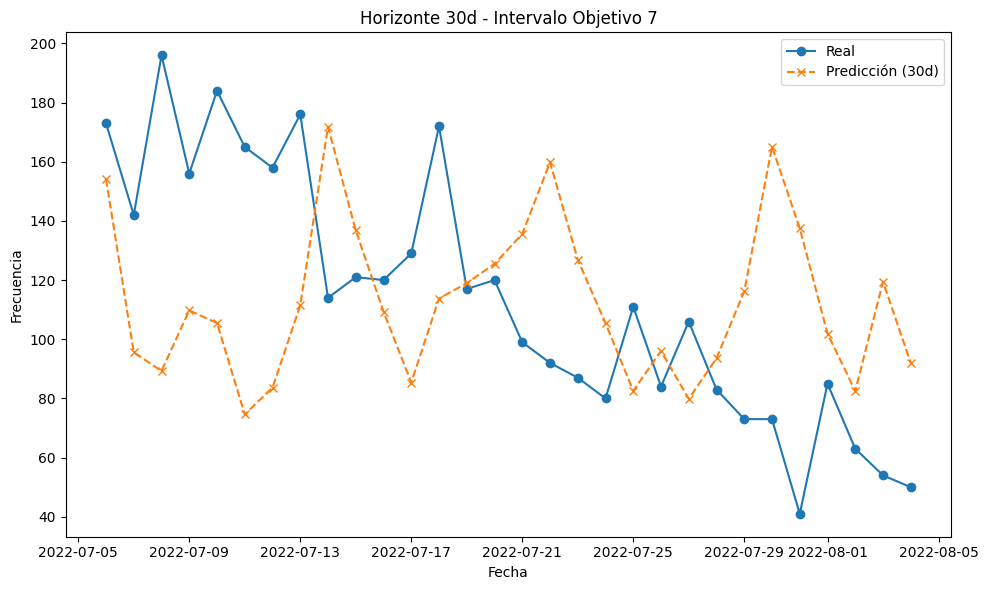


=== RESUMEN FINAL DE MÉTRICAS ===

Horizonte 15 días:
MAE promedio: 208.0061
MSE promedio: 140740.9210
SMAPE promedio: 67.6962%

Horizonte 30 días:
MAE promedio: 299.4368
MSE promedio: 227021.8837
SMAPE promedio: 82.3855%


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Configuración global
HORIZONTES = [15, 30]  # Horizontes a evaluar

# Función SMAPE 
def smape(y_true, y_pred, eps=1e-8):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    return 100 * np.mean(numerator / (denominator + eps))

# Estructura para métricas (un diccionario por horizonte)
metricas = {
    horizonte: {'mae': [], 'mse': [], 'smape': []}
    for horizonte in HORIZONTES
}

# Bucle principal por cada horizonte
for horizonte in HORIZONTES:

    tfm = timesfm.TimesFm(
        hparams=timesfm.TimesFmHparams(
            backend="gpu",
            per_core_batch_size=32,
            horizon_len=horizonte,
            num_layers=50
        ),
        checkpoint=timesfm.TimesFmCheckpoint(
            version='torch',
            huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
    )

    print(f"\n=== EVALUANDO HORIZONTE {horizonte} DÍAS ===")
    
    # Iterar desde el segundo intervalo hasta el penúltimo
    for i in range(1, len(intervalos_ordenados) - 1):
        # 1. Definir datos históricos y objetivo
        intervalos_hist = intervalos_ordenados[:i]
        intervalo_objetivo = intervalos_ordenados[i]
        
        # 2. Preparar datos históricos
        df_hist = df[df['Intervalo'].isin(intervalos_hist)]
        data_hist = df_hist[['Fecha', 'Frecuencia']].rename(columns={
            'Fecha': 'ds',
            'Frecuencia': 'sales'
        })
        data_hist["unique_id"] = "series_1"
        
        # 3. Inferencia con contexto igual al horizonte
        forecast_df = tfm.forecast_on_df(
            inputs=data_hist,
            freq='D',
            value_name='sales',
            forecast_context_len=horizonte,  # ¡Clave! Contexto = horizonte
            num_jobs=-1
        )
        
        # 4. Procesar predicciones
        forecast_df['ds'] = pd.to_datetime(forecast_df['ds'])
        forecast_obj = forecast_df[
            (forecast_df['ds'] >= intervalo_objetivo.left) &
            (forecast_df['ds'] < intervalo_objetivo.right)
        ].set_index('ds')
        
        # 5. Obtener valores reales
        df_objetivo = df[df['Intervalo'] == intervalo_objetivo].copy()
        df_objetivo['Fecha'] = pd.to_datetime(df_objetivo['Fecha'])
        df_objetivo = df_objetivo.set_index('Fecha').sort_index()
        
        # 6. Alinear fechas y calcular métricas
        y_true = df_objetivo['Frecuencia'].reindex(forecast_obj.index)
        y_pred = forecast_obj['timesfm']
        
        # Asegurar que tenemos predicciones para el horizonte completo
        if len(y_true) < horizonte:
            print(f"Intervalo {i+1} no tiene suficientes datos para horizonte {horizonte}")
            continue
        
        # Calcular métricas
        metricas[horizonte]['mae'].append(mean_absolute_error(y_true, y_pred))
        metricas[horizonte]['mse'].append(mean_squared_error(y_true, y_pred))
        metricas[horizonte]['smape'].append(smape(y_true, y_pred))
        
        # 7. Visualización específica por horizonte
        plt.figure(figsize=(10, 6))
        plt.plot(y_true, label='Real', marker='o', linestyle='-')
        plt.plot(y_pred, label=f'Predicción ({horizonte}d)', linestyle='--', marker='x')
        plt.title(f'Horizonte {horizonte}d - Intervalo Objetivo {i+1}')
        plt.xlabel('Fecha')
        plt.ylabel('Frecuencia')
        plt.legend()
        plt.tight_layout()
        plt.show()

# 8. Reporte final de métricas por horizonte
print("\n=== RESUMEN FINAL DE MÉTRICAS ===")
for horizonte in HORIZONTES:
    print(f"\nHorizonte {horizonte} días:")
    print(f"MAE promedio: {np.mean(metricas[horizonte]['mae']):.4f}")
    print(f"MSE promedio: {np.mean(metricas[horizonte]['mse']):.4f}")
    print(f"SMAPE promedio: {np.mean(metricas[horizonte]['smape']):.4f}%")

### Finetuning Timestf 
Vamos a realizar un finetuning del modelo timestf con nuestros datos de la serie de tiempo.


In [7]:
import yfinance as yf

df = yf.download("AAPL", start="2010-01-01", end="2019-01-01")
time_series = df["Close"].values

time_series

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


array([[ 6.44033098],
       [ 6.45146418],
       [ 6.34884596],
       ...,
       [37.24500275],
       [37.26408768],
       [37.62425232]])

In [8]:
time_series.shape

(2264, 1)

In [ ]:
df = pd.read_csv('serie.csv')

time_series = df['Frecuencia'].values
time_series

array([2., 1., 1., ..., 7., 8., 8.])

In [10]:
time_series.shape

(1129,)

In [1]:
from os import path
from typing import Optional, Tuple

import numpy as np
import pandas as pd
import torch
import torch.multiprocessing as mp
import yfinance as yf
from finetuning_torch import FinetuningConfig, TimesFMFinetuner
from huggingface_hub import snapshot_download
from torch.utils.data import Dataset

from timesfm import TimesFm, TimesFmCheckpoint, TimesFmHparams
from timesfm.pytorch_patched_decoder import PatchedTimeSeriesDecoder
import os


class TimeSeriesDataset(Dataset):
  """Dataset for time series data compatible with TimesFM."""

  def __init__(self,
               series: np.ndarray,
               context_length: int,
               horizon_length: int,
               freq_type: int = 0):
    """
        Initialize dataset.

        Args:
            series: Time series data
            context_length: Number of past timesteps to use as input
            horizon_length: Number of future timesteps to predict
            freq_type: Frequency type (0, 1, or 2)
        """
    if freq_type not in [0, 1, 2]:
      raise ValueError("freq_type must be 0, 1, or 2")

    self.series = series
    self.context_length = context_length
    self.horizon_length = horizon_length
    self.freq_type = freq_type
    self._prepare_samples()

  def _prepare_samples(self) -> None:
    """Prepare sliding window samples from the time series."""
    self.samples = []
    total_length = self.context_length + self.horizon_length

    for start_idx in range(0, len(self.series) - total_length + 1):
      end_idx = start_idx + self.context_length
      x_context = self.series[start_idx:end_idx]
      x_future = self.series[end_idx:end_idx + self.horizon_length]
      self.samples.append((x_context, x_future))

  def __len__(self) -> int:
    return len(self.samples)

  def __getitem__(
      self, index: int
  ) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
    x_context, x_future = self.samples[index]

    x_context = torch.tensor(x_context, dtype=torch.float32)
    x_future = torch.tensor(x_future, dtype=torch.float32)

    input_padding = torch.zeros_like(x_context)
    freq = torch.tensor([self.freq_type], dtype=torch.long)

    return x_context, input_padding, freq, x_future

def prepare_datasets(series: np.ndarray,
                     context_length: int,
                     horizon_length: int,
                     freq_type: int = 0,
                     train_split: float = 0.8) -> Tuple[Dataset, Dataset]:
  """
    Prepare training and validation datasets from time series data.

    Args:
        series: Input time series data
        context_length: Number of past timesteps to use
        horizon_length: Number of future timesteps to predict
        freq_type: Frequency type (0, 1, or 2)
        train_split: Fraction of data to use for training

    Returns:
        Tuple of (train_dataset, val_dataset)
    """
  train_size = int(len(series) * train_split)
  train_data = series[:train_size]
  val_data = series[train_size:]

  # Create datasets with specified frequency type
  train_dataset = TimeSeriesDataset(train_data,
                                    context_length=context_length,
                                    horizon_length=horizon_length,
                                    freq_type=freq_type)

  val_dataset = TimeSeriesDataset(val_data,
                                  context_length=context_length,
                                  horizon_length=horizon_length,
                                  freq_type=freq_type)

  return train_dataset, val_dataset

TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.


c:\Users\criju\.conda\envs\ts\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded PyTorch TimesFM.


In [2]:
def get_model(load_weights: bool = False):
  device = "cuda" if torch.cuda.is_available() else "cpu"
  repo_id = "google/timesfm-2.0-500m-pytorch"
  hparams = TimesFmHparams(
      backend=device,
      per_core_batch_size=32,
      horizon_len=128,
      num_layers=50,
      context_len=192,  # Context length can be anything up to 2048 in multiples of 32
  )
  tfm = TimesFm(hparams=hparams,
                checkpoint=TimesFmCheckpoint(huggingface_repo_id=repo_id))

  model = PatchedTimeSeriesDecoder(tfm._model_config)
  if load_weights:
    checkpoint_path = path.join(snapshot_download(repo_id), "torch_model.ckpt")
    loaded_checkpoint = torch.load(checkpoint_path, weights_only=True)
    model.load_state_dict(loaded_checkpoint)
  return model, hparams, tfm._model_config


In [3]:
def plot_predictions(
    model: TimesFm,
    val_dataset: Dataset,
    save_path: Optional[str] = "predictions.png",
) -> None:
  """
    Plot model predictions against ground truth for a batch of validation data.

    Args:
      model: Trained TimesFM model
      val_dataset: Validation dataset
      save_path: Path to save the plot
    """
  import matplotlib.pyplot as plt

  model.eval()

  x_context, x_padding, freq, x_future = val_dataset[0]
  x_context = x_context.unsqueeze(0)  # Add batch dimension
  x_padding = x_padding.unsqueeze(0)
  freq = freq.unsqueeze(0)
  x_future = x_future.unsqueeze(0)

  device = next(model.parameters()).device
  x_context = x_context.to(device)
  x_padding = x_padding.to(device)
  freq = freq.to(device)
  x_future = x_future.to(device)

  with torch.no_grad():
    predictions = model(x_context, x_padding.float(), freq)
    predictions_mean = predictions[..., 0]  # [B, N, horizon_len]
    last_patch_pred = predictions_mean[:, -1, :]  # [B, horizon_len]

  context_vals = x_context[0].cpu().numpy()
  future_vals = x_future[0].cpu().numpy()
  pred_vals = last_patch_pred[0].cpu().numpy()

  context_len = len(context_vals)
  horizon_len = len(future_vals)

  plt.figure(figsize=(12, 6))

  plt.plot(range(context_len),
           context_vals,
           label="Historical Data",
           color="blue",
           linewidth=2)

  plt.plot(
      range(context_len, context_len + horizon_len),
      future_vals,
      label="Ground Truth",
      color="green",
      linestyle="--",
      linewidth=2,
  )

  plt.plot(range(context_len, context_len + horizon_len),
           pred_vals,
           label="Prediction",
           color="red",
           linewidth=2)

  plt.xlabel("Time Step")
  plt.ylabel("Value")
  plt.title("TimesFM Predictions vs Ground Truth")
  plt.legend()
  plt.grid(True)

  if save_path:
    plt.savefig(save_path)
    print(f"Plot saved to {save_path}")

  plt.close()

In [4]:
def get_data(context_len: int,
             horizon_len: int,
             freq_type: int = 0) -> Tuple[Dataset, Dataset]:
  # df = yf.download("AAPL", start="2010-01-01", end="2019-01-01")
  # time_series = df["Close"].values
  df = pd.read_csv('serie.csv')

  time_series = df['Frecuencia'].astype(int).values

  time_series

  train_dataset, val_dataset = prepare_datasets(
      series=time_series,
      context_length=context_len,
      horizon_length=horizon_len,
      freq_type=freq_type,
      train_split=0.8,
  )

  print(f"Created datasets:")
  print(f"- Training samples: {len(train_dataset)}")
  print(f"- Validation samples: {len(val_dataset)}")
  print(f"- Using frequency type: {freq_type}")
  return train_dataset, val_dataset



def single_gpu_example():
  """Basic example of finetuning TimesFM on stock data."""
  model, hparams, tfm_config = get_model(load_weights=True)
  config = FinetuningConfig(batch_size=256,
                            num_epochs=5,
                            learning_rate=1e-4,
                            use_wandb=True,
                            freq_type=1,
                            log_every_n_steps=10,
                            val_check_interval=0.5,
                            use_quantile_loss=True)

  train_dataset, val_dataset = get_data(128,
                                        tfm_config.horizon_len,
                                        freq_type=config.freq_type)
  finetuner = TimesFMFinetuner(model, config)

  print("\nStarting finetuning...")
  results = finetuner.finetune(train_dataset=train_dataset,
                               val_dataset=val_dataset)

  print("\nFinetuning completed!")
  print(f"Training history: {len(results['history']['train_loss'])} epochs")

  plot_predictions(
      model=model,
      val_dataset=val_dataset,
      save_path="timesfm_predictions.png",
  )

In [5]:
single_gpu_example()

Fetching 5 files: 100%|██████████| 5/5 [00:00<?, ?it/s]
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Created datasets:
- Training samples: 648
- Validation samples: 0
- Using frequency type: 1


wandb: Currently logged in as: crascris1234 (crascris1234-universidad-industrial-de-santander) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Starting finetuning...


ZeroDivisionError: float division by zero